## Observations and Insights 

The reason for this study was to test the efficacy of a new drug, "Capomulin," on the treatment a parrticular
form of skin camcer called, "squamous cell carcinoma (SCC)."
The test used a sample of 249* rats, all of wiich had veridfied cases of SCC.

I employed a variety of programmatical tools and statistical methods to ascertain and illustrate the various 
components and outcomes provided by this research study. In the course of my data analysis, I made three observations that 
I think are both essential and insightful into the study of Capomulin, as it compares to other similar drugs.


1.It should noted that the sample  group of mice was almost 50% male and 50% female. I think this important 
because it more closely reflects those in the general population who have or are at risk from developing SCC.
To illustrate the importance of this observation, as it relates to the biological sex of the subject’s, it should be noted that 
this type of cancer does not carry a bias towards, or attacks on only one of the biological sexes. Unlike the 
incredibly one-sided preference towards testing only male’s that makes up the bulk of the research done on heart disease,
and therefore, should be viewed with caution by females, this study took into account the distribution of the different biological sexes
that make the general population.


2.There appears to be a strong positive correlation between mouse weight and average tumor volume. 
I came to this conclusion by calculating Pearson’s correlation coefficient, or Pearson’s r. 
This calculation describes the variability between  factors, or to put it in layman’s terms, how much one 
variable can be used to reliably predict the other variable (it is not be interpreted as a causal phenomenon, but rather 
that a relationship does exist between variables). The closer Pearson’s r is to +1 the stronger the positive correlation; and in this study
the value of Pearson’s r was 0.84.


3.The final observation, and probably the most promising observation came when I looked at the average size of 
the tumor each mouse exhibited at the end of the study. The rats treated with Capomulin, had an average tumor 
volume, which was measured in millimeters cubed (mm3), of 38.1262(mm3). whereas two of the other three drugs we focused on, had tumor volumes around 60(mm3).
This data, though it is not the end-all of data that should be obtained, definitely should bode well with our investors
and the various agencies involved in the regulatory aspects of new pharmaceuticals


* Please note that we had to remove all data collected from a single rat due to the data being duplicated.
We do not believe, given the robust size of our sample population, that the removal of the data belonging to this rat caused any 
noticeable, or significant on the results we obtained. 

.


In [697]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
combined_data.head(75)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21.0,16.0,0,45.000000,0
1,k403,Ramicane,Male,21.0,16.0,5,38.825898,0
2,k403,Ramicane,Male,21.0,16.0,10,35.014271,1
3,k403,Ramicane,Male,21.0,16.0,15,34.223992,1
4,k403,Ramicane,Male,21.0,16.0,20,32.997729,1
...,...,...,...,...,...,...,...,...
70,m546,Ramicane,Male,18.0,16.0,25,37.444445,0
71,m546,Ramicane,Male,18.0,16.0,30,37.969934,0
72,m546,Ramicane,Male,18.0,16.0,35,38.627536,1
73,m546,Ramicane,Male,18.0,16.0,40,35.114575,1


In [698]:
# Checking the number of mice.
total_mice = combined_data["Mouse ID"].nunique()
total_mice


249

In [699]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [700]:
# Get all the data for duplicate Mouse ID
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id


,0
0,g989


In [701]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# I identified the Mouse (Mouse ID: g989), that had duplicate Timepoint values using the command above
# I then removed that mouses data from the original "Mouse metadata" csv file. However, Mouse g989nwas till in the dataframe but. has vslues = NaN. 
# So I ran the command df.dropna(), thereby removing all of mouse g989 data.
# I then crested the new dataframe, "clean_df" which I will use to cinduct the data anaylsis
# Below is the new and cleaned up DataFrame
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21.0,16.0,0,45.000000,0
1,k403,Ramicane,Male,21.0,16.0,5,38.825898,0
2,k403,Ramicane,Male,21.0,16.0,10,35.014271,1
3,k403,Ramicane,Male,21.0,16.0,15,34.223992,1
4,k403,Ramicane,Male,21.0,16.0,20,32.997729,1


In [702]:
mice = clean_df["Mouse ID"].value_counts()
number_of_mice = len(mice)
number_of_mice

248

## Summary Statistics

In [703]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [704]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_dev = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
tumor_regimen_df = pd.DataFrame({"Mean":mean, "Median":median,"Variance":variance, "Standard Dev":standard_dev, "SEM":sem})
tumor_regimen_df
                                  
                                                                                     
  

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

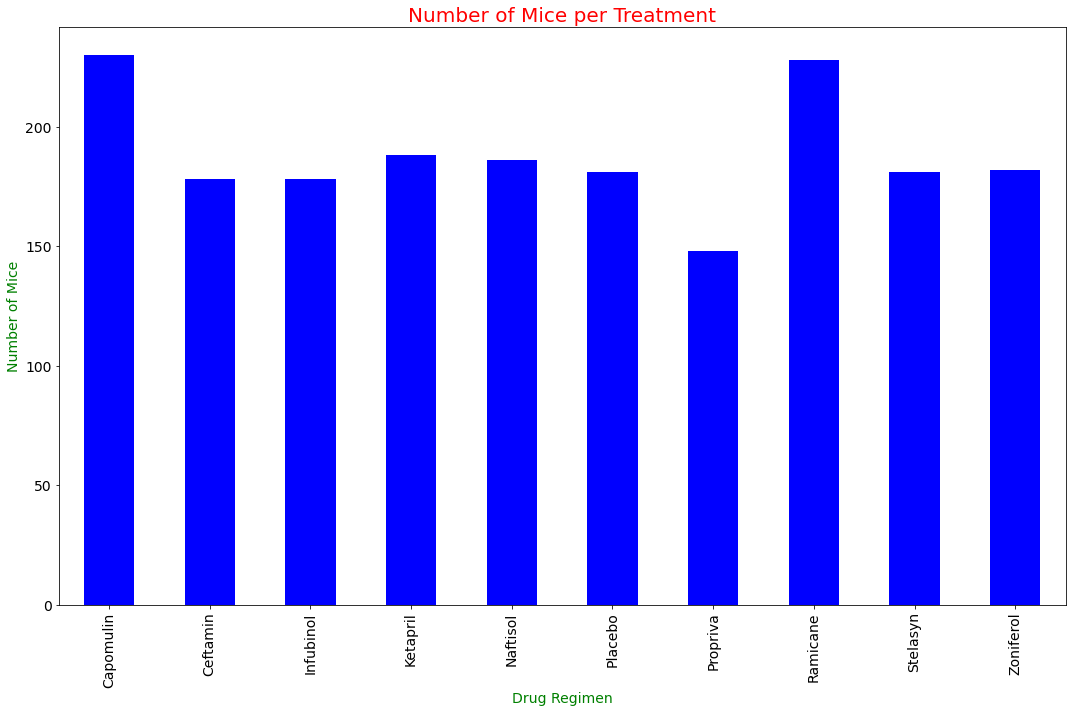

In [705]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

total_mice_per_regimen = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = total_mice_per_regimen.plot.bar(figsize=(15,10), color="b", fontsize="14")
x_axis = np.arange(len(clean_df))
tick_locations = [value for value in x_axis]
                                              
                                              
plt.xlabel("Drug Regimen", fontsize = 14, color="g")
plt.ylabel("Number of Mice", fontsize = 14, color="g")
plt.title("Number of Mice per Treatment",fontsize = 20, color="r")

plt.savefig("../Images/mice_per_drug_reg.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()





In [706]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_id_drug =(clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_id_drug

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

Text(0, 0.5, 'number of Mice')

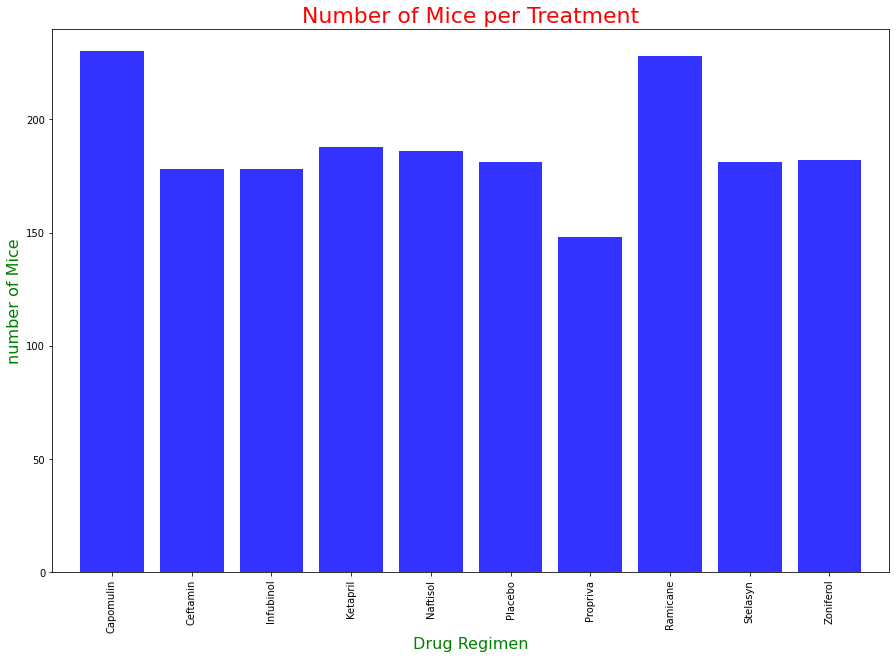

In [707]:
x_axis = np.arange(len(total_mice_per_regimen))
fig1, ax1 = plt.subplots(figsize=(15,10))

plt.bar(x_axis, mice_id_drug, color="b", alpha=0.8, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane",
                           "Stelasyn", "Zoniferol"], rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_id_drug)+10)



plt.title("Number of Mice per Treatment",fontsize=22, color="r")
plt.xlabel("Drug Regimen", fontsize=16, color="g")
plt.ylabel("number of Mice", fontsize=16, color="g")

In [708]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# groupby gender to get values of distribution
gender_grouped = clean_df.groupby(["Mouse ID", "Sex"])
gender_grouped
gender_df = pd.DataFrame(gender_grouped.size())

# Create df with the total amount of Male and female mice

mouse_gender = gender_df.groupby(["Sex"]).count()
total_count = sum(mouse_gender)
total_count

#perlcenrtag_of_sex = 


0

In [709]:
gender_count_df.shape

(2, 1)

In [710]:
females=123
males=125
mouse_totals = (females + males)

mouse_percentage_fem_df = ((females / mouse_totals)*100)
mouse_percentage_fem_df

49.596774193548384

In [711]:
mouse_percentage_male_df = ((males / mouse_totals)*100)
mouse_percentage_male_df

50.403225806451616

In [712]:
gender_data = {'Total Count': ['123', '125'],
       'Percentage of Sex': ['49.79', '50.20']}
gender_percent_df = pd.DataFrame(gender_data, index = ['Female', 'Male'])
gender_percent_df

,Total Count,Percentage of Sex
Female,123,49.79
Male,125,50.20


In [713]:
# labels for pie chart
#labels = ["Females", "Males"]
# the values for each section of pie chart

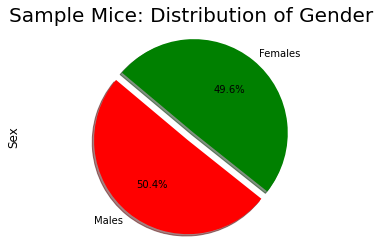

In [714]:
labels = ["Males", "Females"]

sizes = [125, 123]

explode = [0.1, 0]

colors = ["red", "green"]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


plt.title("Sample Mice: Distribution of Gender", fontsize=20)
plt.ylabel("Sex", fontsize=12)
plt.axis("equal")



plt.savefig("../Images/pi_panda.png", bbox_inches = "tight")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

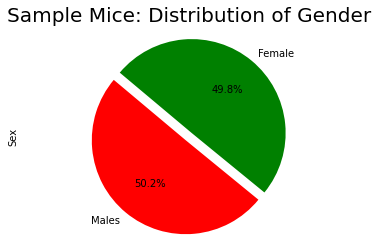

In [715]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Males", "Female"]
sizes = [50.2008, 49.7991]
colors = ['red', 'green']
explode = (0.1,0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140,)
plt.show
plt.title("Sample Mice: Distribution of Gender", fontsize=20)
plt.ylabel("Sex",)
plt.axis("equal")
plt.show

## Quartiles, Outliers and Boxplots

In [716]:
# Final Tumor Volume of Each mouse Across ther four Most Promising Tx Regimens
#-----------------------------------------------------------------------------
# Calculate the final tumor volume of each mouse across four of the treatment regimens:Capomulin, Ramicane, 
# Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

Ramicane_df = data_combined_df.loc[data_combined_df["Drug Regimen"] == "Ramicane",:]

Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]

Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]

In [717]:
# Start by getting the last (greatest) timepoint for each mouse

Capomulin

In [718]:
Capo_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capo_vol = pd.DataFrame(Capo_last)
Capo_merged = pd.merge(Capo_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Capo_merged.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#capo_merge_df = pd.merge(vol_capo_df, clean_df, on=("Mouse ID", "Timepoint"), how="left") 
#capo_merge_df.shape

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9.0,22.0,38.982878,2
1,b742,45,Capomulin,Male,7.0,21.0,38.939633,0
2,f966,20,Capomulin,Male,16.0,17.0,30.485985,0
3,g288,45,Capomulin,Male,3.0,19.0,37.074024,1
4,g316,45,Capomulin,Female,22.0,22.0,40.159220,2


--------------------------------------------------------------------------

Capomulin: Qartiles, IQR, and Outlier Boundaries

In [719]:
Capo_reg = Capo_merged["Tumor Volume (mm3)"]

In [720]:
quartiles = Capo_reg.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"- The lower quartile of Capomulin tumors: {lowerq.round(4)}")
print(f"- The upper quartile of Capomulin tumors: {upperq.round(4)}")
print(f"- The interquartile raange of Capomulin tumors: {iqr.round(4)}")
print(f"- The median of Capomulin tumors: {quartiles[0.5].round(4)}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"- Values below {lower_bound.round(4)} could be outliers")
print(f"- Values above {upper_bound.round(4)} could be outliers")
print("-----------------------------------------------------")

- The lower quartile of Capomulin tumors: 32.3774
- The upper quartile of Capomulin tumors: 40.1592
- The interquartile raange of Capomulin tumors: 7.7819
- The median of Capomulin tumors: 38.1252
- Values below 20.7046 could be outliers
- Values above 51.832 could be outliers
-----------------------------------------------------


Ramicane

In [721]:
Rami_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Rami_vol = pd.DataFrame(Rami_last)
Rami_merged = pd.merge(Rami_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Rami_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3.0,22.0,38.407618,1
1,a444,45,Ramicane,Female,10.0,25.0,43.047543,0
2,a520,45,Ramicane,Male,13.0,21.0,38.810366,1
3,a644,45,Ramicane,Female,7.0,17.0,32.978522,1
4,c458,30,Ramicane,Female,23.0,20.0,38.342008,2


Ramicane: Quartiles, IQR, and Outlier Boundaries

In [722]:
Rami_reg = Rami_merged["Tumor Volume (mm3)"]

In [723]:
quartiles = Rami_reg.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"- The lower quartile of Ramicane tumors: {lowerq.round(4)}")
print(f"- The upper quartile of Ramicane tumors: {upperq.round(4)}")
print(f"- The interquartile raange of Ramicane tumors: {iqr.round(4)}")
print(f"- The median of Ramicane tumors: {quartiles[0.5].round(4)}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"- Values below {lower_bound.round(4)} could be outliers")
print(f"- Values above {upper_bound.round(4)} could be outliers")
print("-----------------------------------------------------")

- The lower quartile of Ramicane tumors: 31.5605
- The upper quartile of Ramicane tumors: 40.659
- The interquartile raange of Ramicane tumors: 9.0985
- The median of Ramicane tumors: 36.5617
- Values below 17.9127 could be outliers
- Values above 54.3068 could be outliers
-----------------------------------------------------


---------------------------------------------------------------------------

Infubinol

In [724]:
Infu_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infu_vol = pd.DataFrame(Infu_last)
Infu_merged = pd.merge(Infu_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Infu_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20.0,23.0,67.973419,2
1,a251,45,Infubinol,Female,21.0,25.0,65.525743,1
2,a577,30,Infubinol,Female,6.0,25.0,57.031862,2
3,a685,45,Infubinol,Male,8.0,30.0,66.083066,3
4,c139,45,Infubinol,Male,11.0,28.0,72.226731,2


Infubinol: Quartiles, IQR, and Outlier Boundaries

In [725]:
Infu_reg = Infu_merged["Tumor Volume (mm3)"]

In [726]:
quartiles = Infu_reg.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"- The lower quartile of Infubinol tumors: {lowerq.round(4)}")
print(f"- The upper quartile of Infubinol tumors: {upperq.round(4)}")
print(f"- The interquartile raange of Infubinol tumors: {iqr.round(4)}")
print(f"- The median of Infubinol tumors: {quartiles[0.5].round(4)}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"- Values below {lower_bound.round(4)} could be outliers")
print(f"- Values above {upper_bound.round(4)} could be outliers")
print("-----------------------------------------------------")

- The lower quartile of Infubinol tumors: 54.0486
- The upper quartile of Infubinol tumors: 65.5257
- The interquartile raange of Infubinol tumors: 11.4771
- The median of Infubinol tumors: 60.1652
- Values below 36.8329 could be outliers
- Values above 82.7414 could be outliers
-----------------------------------------------------


--------------------------------------------------------------

Ceftamin

In [727]:
Ceft_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceft_vol = pd.DataFrame(Ceft_last)
Ceft_merged = pd.merge(Ceft_vol, combined_data, on=("Mouse ID","Timepoint"),how="left")
Ceft_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20.0,28.0,62.999356,3
1,b447,0,Ceftamin,Male,2.0,30.0,45.000000,0
2,b487,25,Ceftamin,Female,6.0,28.0,56.057749,1
3,b759,30,Ceftamin,Female,12.0,25.0,55.742829,1
4,f436,15,Ceftamin,Female,3.0,25.0,48.722078,2


Ceftamin: Quartiles, IQR, and Outlier Boundaries

In [728]:
Ceft_reg = Infu_merged["Tumor Volume (mm3)"]

In [729]:
quartiles = Ceft_reg.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"- The lower quartile of Ceftamin tumors: {lowerq.round(4)}")
print(f"- The upper quartile of Ceftamin tumors: {upperq.round(4)}")
print(f"- The interquartile raange of Ceftamin tumors: {iqr.round(4)}")
print(f"- The median of Ceftamin tumors: {quartiles[0.5].round(4)}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"- Values below {lower_bound.round(4)} could be outliers")
print(f"- Values above {upper_bound.round(4)} could be outliers")
print("-----------------------------------------------------")

- The lower quartile of Ceftamin tumors: 54.0486
- The upper quartile of Ceftamin tumors: 65.5257
- The interquartile raange of Ceftamin tumors: 11.4771
- The median of Ceftamin tumors: 60.1652
- Values below 36.8329 could be outliers
- Values above 82.7414 could be outliers
-----------------------------------------------------


In [730]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [731]:
import matplotlib
matplotlib.axes.Axes.boxplot
matplotlib.pyplot.boxplot
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

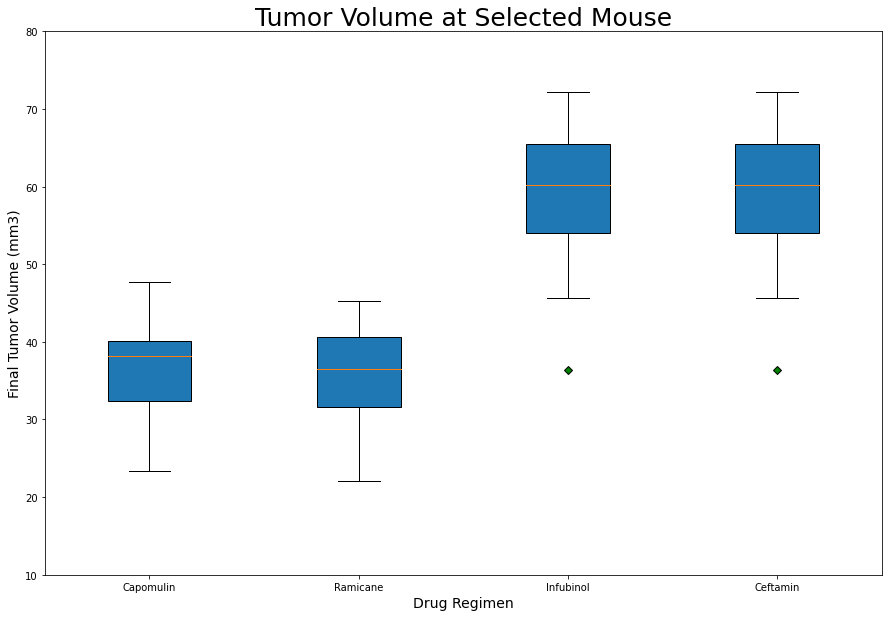

In [732]:
data_to_plot = [Capo_reg, Rami_reg, Infu_reg, Ceft_reg]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True, flierprops=green_diamond)




plt.ylim(10, 80)


plt.show

## Line and Scatter Plots

In [733]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Mouse chiose ID; g316
#GENDER: Female
# Age: 22 months

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g316",:]
forline_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22.0,22.0,0,45.000000,0
352,g316,Capomulin,Female,22.0,22.0,5,44.022752,0
353,g316,Capomulin,Female,22.0,22.0,10,44.502042,0
354,g316,Capomulin,Female,22.0,22.0,15,45.216743,0
355,g316,Capomulin,Female,22.0,22.0,20,45.933322,1
356,g316,Capomulin,Female,22.0,22.0,25,46.809225,1
357,g316,Capomulin,Female,22.0,22.0,30,44.221480,2
358,g316,Capomulin,Female,22.0,22.0,35,44.702833,2
359,g316,Capomulin,Female,22.0,22.0,40,45.565821,2
360,g316,Capomulin,Female,22.0,22.0,45,40.159220,2


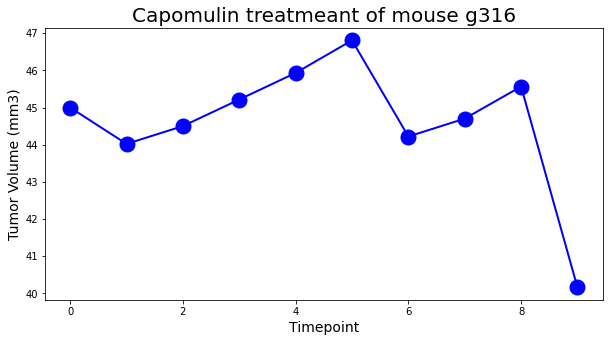

In [734]:

_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Capomulin treatmeant of mouse g316',fontsize =20)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)


plt.savefig("../Images/line_graph.png", bbox_inches = "tight")
plt.show()

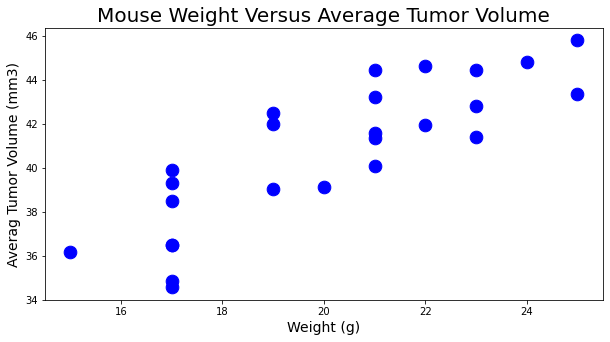

In [735]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(10, 5))
avg_vol_capo =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_vol_capo['Weight (g)'],avg_vol_capo['Tumor Volume (mm3)'],s=160, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =20)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)


plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")

plt.show()

## Correlation and Regression

In [736]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_vol_capo["Weight (g)"], avg_vol_capo["Tumor Volume (mm3)"])[0],2)
print(f"The Correlation between mouse weight and average tumor volume is {corr}")


The Correlation between mouse weight and average tumor volume is 0.84


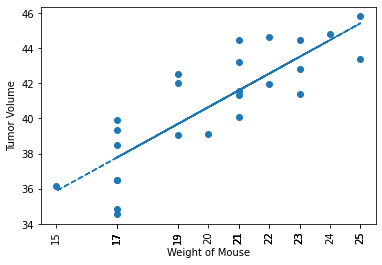

In [737]:
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()


slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      

fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()